This is a demo for fast and step stxm scans on p99. It can be run on any python enironment with blueapi installed, as long as it have access to p99-blueapi.diamond.ac.uk.

In [ ]:
from blueapi.client.client import BlueapiClient
from blueapi.client.event_bus import AnyEvent
from blueapi.config import ApplicationConfig, RestConfig, StompConfig
from blueapi.worker.task import Task
from bluesky_stomp.models import BasicAuthentication
from pydantic import HttpUrl

In [2]:
import h5py
import matplotlib.pyplot as plt
from time import time

In [ ]:
p99Config =ApplicationConfig(
        stomp=StompConfig(
            url=HttpUrl("http://172.23.177.208"),
            auth=BasicAuthentication(username="p99", password=password),  # type: ignore
        ),
        api=RestConfig(url=HttpUrl("https://p99-blueapi.diamond.ac.uk:443")),
    )

In [4]:
bc = BlueapiClient.from_config(config = p99Config)
all_events: list[AnyEvent] = []
starting_scan_no = 18
def on_event(event: AnyEvent):
    all_events.append(event)

Step scan for 2x2mm count time 0.5 and 0.1 steps

In [14]:
stxm= Task(
            name="stxm_step",
            params={
                "dets": ["andor2_point"],
                "count_time": "0.5",
                "x_step_motor": "sample_stage.x",
                "x_step_start": -2,
                "x_step_end": 2,
                "x_step_size": 0.1,
                "y_step_motor": "sample_stage.y",
                "y_step_start": -2.,
                "y_step_end": 2,
                "y_step_size": 0.1,
            },
        )

start= time()
bc.run_task(stxm, on_event=on_event)
stxm_stp_time = time()-start


Time taken 1220.4401817321777
num x point = <HDF5 dataset "value": shape (1681,), type "<f8"> num y point = <HDF5 dataset "value": shape (1681,), type "<f8">
x step = 0.09999999999999987 num y point = 0.09999999999999987


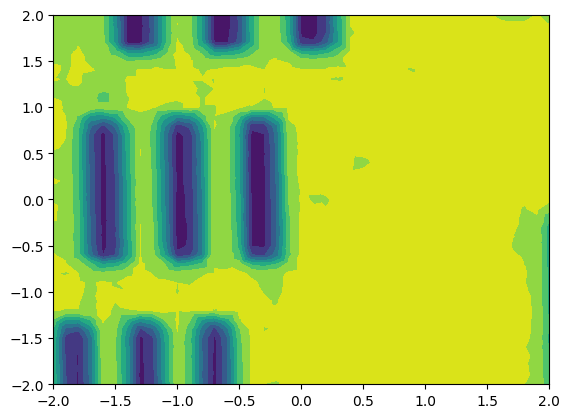

In [8]:
print(f"Time taken {stxm_stp_time}")
starting_scan_no +=1
nexusData = h5py.File(f"/dls_sw/p99/software/blueapi/scratch/data/2025/cm22222-5/bluesky/p99-{starting_scan_no}.nxs",  "r")
data =nexusData["entry/instrument"]
plt.tricontourf(data["sample_stage-x/value"],data["sample_stage-y/value"],data["andor2_point/mean"])
x1 = next((i 
     for i in data["sample_stage-x/value"] 
    if i !=data["sample_stage-x/value"] [0]))
print(f"num x point = {data['sample_stage-x/value']} num y point = {data['sample_stage-y/value']}" )
print(f"x step = {x1-data['sample_stage-x/value'][0]} num y point = {data['sample_stage-y/value'][1]-data['sample_stage-y/value'][0]}" )

Same range as the step scan but using stxm_fast with plan time set to 600sec.

In [5]:
fstxm_no_step= Task(
            name="stxm_fast",
            params={
                "dets": ["andor2_point"],
                "count_time": 0.5,
                "step_motor": "sample_stage.x",
                "step_start": -2.0,
                "step_end": 2.0,
                "scan_motor": "sample_stage.y",
                "scan_start": -2.0,
                "scan_end": 2.0,
                "plan_time": 600,
            },
        )
start= time()
bc.run_task(fstxm_no_step, on_event=on_event)
stxm_fstxm_no_step = time()-start

Time taken 609.3994588851929
num x point = <HDF5 dataset "value": shape (1785,), type "<f8"> num y point = <HDF5 dataset "value": shape (1785,), type "<f8">
x step = 0.12121999999999988 num y point = 0.08655999999999997


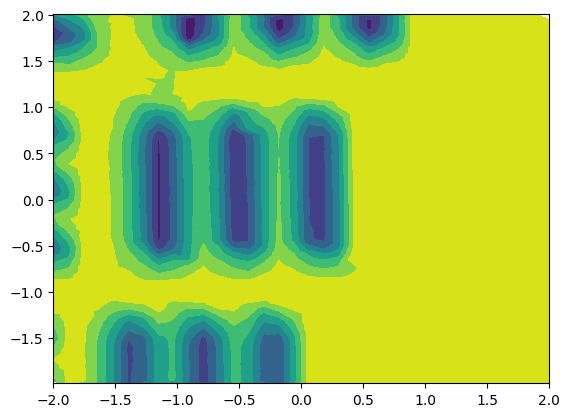

In [10]:
print(f"Time taken {stxm_fstxm_no_step}")
starting_scan_no +=1
nexusData = h5py.File(f"/dls_sw/p99/software/blueapi/scratch/data/2025/cm22222-5/bluesky/p99-{starting_scan_no}.nxs",  "r")
data =nexusData["entry/instrument"]
plt.tricontourf(data["sample_stage-x/value"],data["sample_stage-y/value"],data["andor2_point/mean"])
x1 = next((i 
     for i in data["sample_stage-x/value"] 
    if i !=data["sample_stage-x/value"] [0]))
print(f"num x point = {data['sample_stage-x/value']} num y point = {data['sample_stage-y/value']}" )
print(f"x step = {x1-data['sample_stage-x/value'][0]} num y point = {data['sample_stage-y/value'][1]-data['sample_stage-y/value'][0]}" )

In [6]:
fstxm_no_step= Task(
            name="stxm_fast",
            params={
                "dets": ["andor2_point"],
                "count_time": 0.5,
                "step_motor": "sample_stage.x",
                "step_start": -2.0,
                "step_end": 2.0,
                "scan_motor": "sample_stage.y",
                "scan_start": -2.0,
                "scan_end": 2.0,
                "plan_time": 100,
            },
        )
start= time()
bc.run_task(fstxm_no_step, on_event=on_event)
stxm_fstxm_no_step = time()-start

Time taken 97.53068828582764
num x point = <HDF5 dataset "value": shape (277,), type "<f8"> num y point = <HDF5 dataset "value": shape (277,), type "<f8">
x step = 0.33333999999999997 num y point = 0.1766000000000001


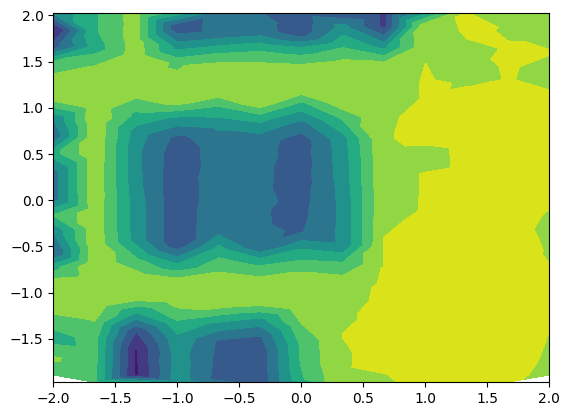

In [8]:
print(f"Time taken {stxm_fstxm_no_step}")
starting_scan_no +=1
nexusData = h5py.File(f"/dls_sw/p99/software/blueapi/scratch/data/2025/cm22222-5/bluesky/p99-{starting_scan_no}.nxs",  "r")
data =nexusData["entry/instrument"]
plt.tricontourf(data["sample_stage-x/value"],data["sample_stage-y/value"],data["andor2_point/mean"])
x1 = next((i 
     for i in data["sample_stage-x/value"] 
    if i !=data["sample_stage-x/value"] [0]))
print(f"num x point = {data['sample_stage-x/value']} num y point = {data['sample_stage-y/value']}" )
print(f"x step = {x1-data['sample_stage-x/value'][0]} num y point = {data['sample_stage-y/value'][1]-data['sample_stage-y/value'][0]}" )

In [ ]:
Fast stxm scan for stage range.

In [9]:
fstxm_no_step= Task(
            name="stxm_fast",
            params={
                "dets": ["andor2_point"],
                "count_time": 0.5,
                "step_motor": "sample_stage.x",
                "step_start": -5.0,
                "step_end": 6.5,
                "scan_motor": "sample_stage.y",
                "scan_start": -3.5,
                "scan_end": 6.5,
                "plan_time": 900,
            },
        )
start= time()
bc.run_task(fstxm_no_step, on_event=on_event)
stxm_fstxm_no_step = time()-start


Time taken 880.8070337772369
num x point = <HDF5 dataset "value": shape (2595,), type "<f8"> num y point = <HDF5 dataset "value": shape (2595,), type "<f8">
x step = -0.5460599999999998 num y point = 0.15641999999999978


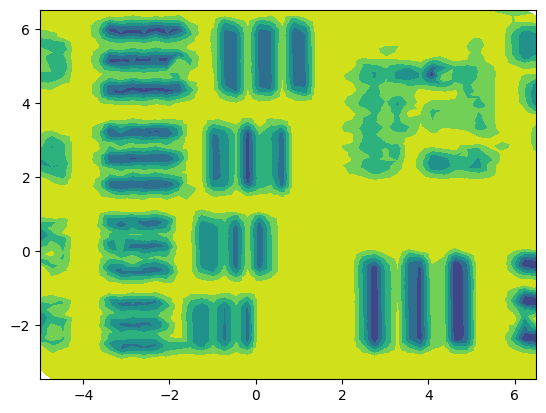

In [12]:
print(f"Time taken {stxm_fstxm_no_step}")
starting_scan_no +=1
nexusData = h5py.File(f"/dls_sw/p99/software/blueapi/scratch/data/2025/cm22222-5/bluesky/p99-{starting_scan_no}.nxs",  "r")
data =nexusData["entry/instrument"]
plt.tricontourf(data["sample_stage-x/value"],data["sample_stage-y/value"],data["andor2_point/mean"])
x1 = next((i 
     for i in data["sample_stage-x/value"] 
    if i !=data["sample_stage-x/value"] [0]))
print(f"num x point = {data['sample_stage-x/value']} num y point = {data['sample_stage-y/value']}" )
print(f"x step = {x1-data['sample_stage-x/value'][0]} num y point = {data['sample_stage-y/value'][1]-data['sample_stage-y/value'][0]}" )

In [ ]:
fast scan for the smaller features.

In [62]:
fstxm_no_step= Task(
            name="stxm_fast",
            params={
                "dets": ["andor2_point"],
                "count_time": 0.25,
                "step_motor": "sample_stage.x",
                "step_start": 1.0,
                "step_end": 5.5,
                "scan_motor": "sample_stage.y",
                "scan_start": 1,
                "scan_end": 6.0,
                "plan_time": 1800,
            },
        )
start= time()
bc.run_task(fstxm_no_step, on_event=on_event)
stxm_fstxm_no_step = time()-start


Time taken 1801.7415707111359
num x point = <HDF5 dataset "value": shape (5329,), type "<f8"> num y point = <HDF5 dataset "value": shape (5329,), type "<f8">
x step = 0.21650000000000014 num y point = 0.08357999999999999


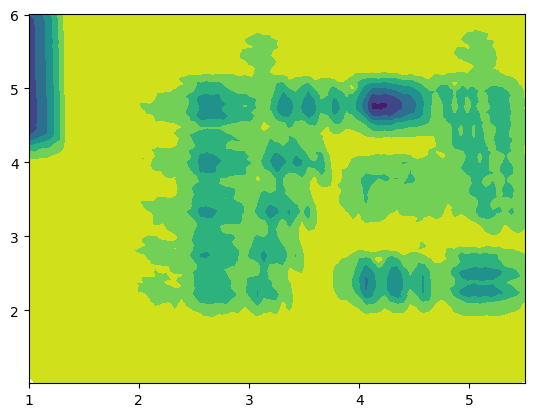

In [66]:
print(f"Time taken {stxm_fstxm_no_step}")
starting_scan_no +=1
nexusData = h5py.File(f"/dls_sw/p99/software/blueapi/scratch/data/2025/cm22222-5/bluesky/p99-{starting_scan_no}.nxs",  "r")
data =nexusData["entry/instrument"]
plt.tricontourf(data["sample_stage-x/value"],data["sample_stage-y/value"],data["andor2_point/mean"])
x1 = next((i 
     for i in data["sample_stage-x/value"] 
    if i !=data["sample_stage-x/value"] [0]))
print(f"num x point = {data['sample_stage-x/value']} num y point = {data['sample_stage-y/value']}" )
print(f"x step = {x1-data['sample_stage-x/value'][0]} num y point = {data['sample_stage-y/value'][1]-data['sample_stage-y/value'][0]}" )

In [ ]:
fast scan for the smaller features with better range and less count time.

In [80]:
fstxm_no_step= Task(
            name="stxm_fast",
            params={
                "dets": ["andor2_point"],
                "count_time": 0.25,
                "step_motor": "sample_stage.x",
                "step_start": 1.75,
                "step_end": 5.75,
                "scan_motor": "sample_stage.y",
                "scan_start": 1.75,
                "scan_end": 5.75,
                "plan_time": 600,
                "step_size": 0.1
            },
        )
start= time()
bc.run_task(fstxm_no_step, on_event=on_event)
stxm_fstxm_no_step = time()-start


Time taken 433.87946939468384
num x point = <HDF5 dataset "value": shape (1271,), type "<f8"> num y point = <HDF5 dataset "value": shape (1271,), type "<f8">
x step = 0.10255999999999998 num y point = 0.14359999999999995


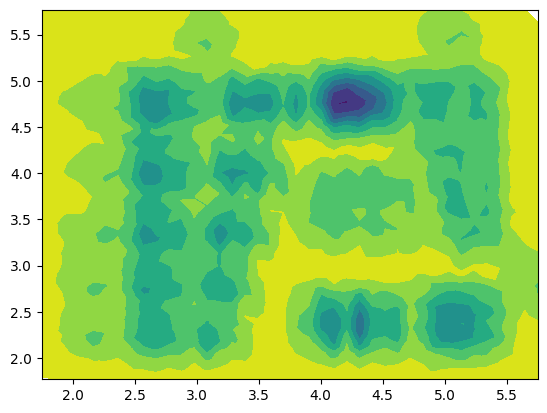

In [109]:
print(f"Time taken {stxm_fstxm_no_step}")
starting_scan_no +=1
nexusData = h5py.File(f"/dls_sw/p99/software/blueapi/scratch/data/2025/cm22222-5/bluesky/p99-{starting_scan_no}.nxs",  "r")
data =nexusData["entry/instrument"]
plt.tricontourf(data["sample_stage-x/value"],data["sample_stage-y/value"],data["andor2_point/mean"])
x1 = next((i 
     for i in data["sample_stage-x/value"] 
    if i !=a[0]))
print(f"num x point = {data['sample_stage-x/value']} num y point = {data['sample_stage-y/value']}" )
print(f"x step = {x1-data['sample_stage-x/value'][0]} num y point = {data['sample_stage-y/value'][1]-data['sample_stage-y/value'][0]}" )

In [ ]:
Six times the count time.

In [67]:
fstxm_no_step= Task(
            name="stxm_fast",
            params={
                "dets": ["andor2_point"],
                "count_time": 0.25,
                "step_motor": "sample_stage.x",
                "step_start": 1.75,
                "step_end": 5.75,
                "scan_motor": "sample_stage.y",
                "scan_start": 1.75,
                "scan_end": 5.75,
                "plan_time": 3600,
            },
        )
start= time()
bc.run_task(fstxm_no_step, on_event=on_event)
stxm_fstxm_no_step = time()-start


Time taken 3640.0894265174866
num x point = <HDF5 dataset "value": shape (10812,), type "<f8"> num y point = <HDF5 dataset "value": shape (10812,), type "<f8">
x step = 0.03389999999999982 num y point = 0.048860000000000126


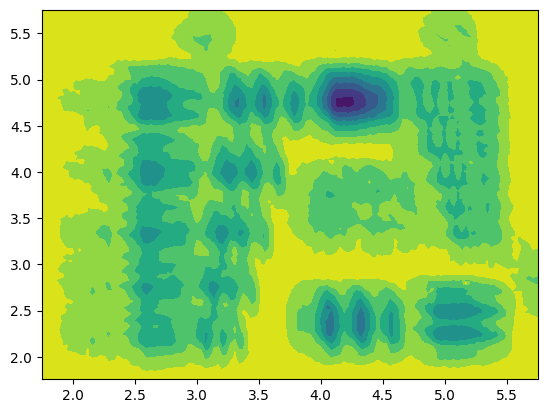

In [78]:
print(f"Time taken {stxm_fstxm_no_step}")
starting_scan_no +=1
nexusData = h5py.File(f"/dls_sw/p99/software/blueapi/scratch/data/2025/cm22222-5/bluesky/p99-{starting_scan_no}.nxs",  "r")
data =nexusData["entry/instrument"]
plt.tricontourf(data["sample_stage-x/value"],data["sample_stage-y/value"],data["andor2_point/mean"])
print(f"num x point = {data['sample_stage-x/value']} num y point = {data['sample_stage-y/value']}" )
print(f"x step = {data['sample_stage-x/value'][100]-data['sample_stage-x/value'][1]} num y point = {data['sample_stage-y/value'][1]-data['sample_stage-y/value'][0]}" )

In [ ]:
Step scan with the above step size. 

In [116]:
stxm= Task(
            name="stxm_step",
            params={
                "dets": ["andor2_point"],
                "count_time": 0.25,
                "x_step_motor": "sample_stage.x",
                "x_step_start": 1.75,
                "x_step_end": 5.75,
                "x_step_size": 0.034,
                "y_step_motor": "sample_stage.y",
                "y_step_start": 1.75,
                "y_step_end": 5.75,
                "y_step_size": 0.049,
            },
        )

start= time()
bc.run_task(stxm, on_event=on_event)
stxm_time = time()-start


Time taken 5962.411924362183
num x point = <HDF5 dataset "value": shape (9676,), type "<f8"> num y point = <HDF5 dataset "value": shape (9676,), type "<f8">
x step = 0.03417999999999988 num y point = 0.04937999999999998


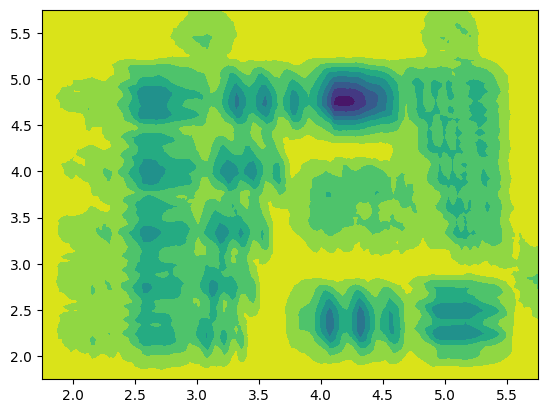

In [117]:
print(f"Time taken {stxm_time}")
starting_scan_no +=1
nexusData = h5py.File(f"/dls_sw/p99/software/blueapi/scratch/data/2025/cm22222-5/bluesky/p99-{starting_scan_no}.nxs",  "r")
data =nexusData["entry/instrument"]
plt.tricontourf(data["sample_stage-x/value"],data["sample_stage-y/value"],data["andor2_point/mean"])
x1 = next((i 
     for i in data["sample_stage-x/value"] 
    if i !=a[0]))
print(f"num x point = {data['sample_stage-x/value']} num y point = {data['sample_stage-y/value']}" )
print(f"x step = {x1-data['sample_stage-x/value'][0]} num y point = {data['sample_stage-y/value'][1]-data['sample_stage-y/value'][0]}" )